This runs through a few of the simpler parameters you can adjust when running a simulation.   

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from clone_competition_simulation import Parameters

# Parameter warnings

Most parameter options will not be explicitly specified when running a simulation.   
These will be set using the default values. 

Set `print_warnings=True` (the default option) to see some of the default options used when running a simulation.  

In [3]:
p = Parameters(algorithm='Moran2D', initial_cells=400)

============== Setting up ==============
Using a grid of 20x20
Using the default division rate: 1
Using the default max time: 10
4000 simulation_steps
Using the default mutation rate: 0


# Simulation progress

Some larger simulations can be slow to run.  
To keep track of how far through a simulation has reached, use the `progress` option.   

This does not work for the Branching algorithm.   

For the other algorithms, setting progress=X will print every X simulation steps.   

For the Moran and Moran2D algorithms, each step is a single cell birth/cell death pair. Set progress to a high number to prevent too much printing.   
For the WF and WF2D algorithms, each step is a cell generation.   

In [5]:
p = Parameters(algorithm='Moran2D', initial_cells=40000, progress=50000)
s = p.get_simulator()
s.run_sim()

============== Setting up ==============
Using a grid of 200x200
Using the default division rate: 1
Using the default max time: 10
400000 simulation_steps
Using the default mutation rate: 0
0 mutations to add
Steps completed:
50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, Finished 400000 steps


In [7]:
p = Parameters(algorithm='WF2D', initial_cells=40000, progress=2)
s = p.get_simulator()
s.run_sim()

============== Setting up ==============
Using a grid of 200x200
Using the default division rate: 1
Using the default max time: 10
10 simulation_steps
Using the default mutation rate: 0
0 mutations to add
Steps completed:
2, 4, 6, 8, 10, Finished 10 steps


# Division rate

By default, the division rate is 1 (one division per time unit).     

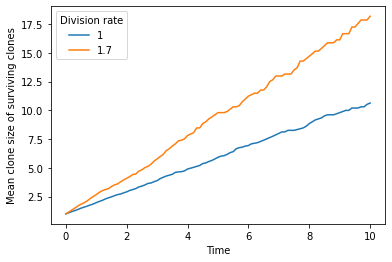

In [16]:
# Default division_rate is 1
p = Parameters(algorithm='Moran', initial_size_array=np.ones(1000), print_warnings=False)  
s = p.get_simulator()
s.run_sim()

# Increase the division_rate
p = Parameters(algorithm='Moran', initial_size_array=np.ones(1000), division_rate=1.7, print_warnings=False)  
s2 = p.get_simulator()
s2.run_sim()

s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label=1)
s2.plot_mean_clone_size_graph_for_non_mutation(ax=plt.gca(), show_spm_fit=False, legend_label=1.7)
plt.legend(title='Division rate');

# Simulation length and sampling times

The length of a simulation can be specified in a few different ways.  

============== Setting up ==============
Using the default division rate: 1
20000 simulation_steps
Using the default mutation rate: 0


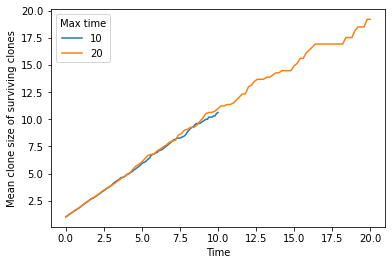

In [22]:
# Set the max_time. By default this is 10
# Can run a longer simulation by setting max_time=20
p = Parameters(algorithm='Moran', initial_size_array=np.ones(1000), max_time=20, print_warnings=True)
s20 = p.get_simulator()
s20.run_sim()

s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label=10)
s20.plot_mean_clone_size_graph_for_non_mutation(ax=plt.gca(), show_spm_fit=False, legend_label=20)
plt.legend(title='Max time')

The number of simulation steps can be set instead of the max_time  

The relationship between time and steps will depend on the division_rate and the algorithm.  

============== Setting up ==============
Using the default division rate: 1
Max time for the simulation is 15.0
Using the default mutation rate: 0


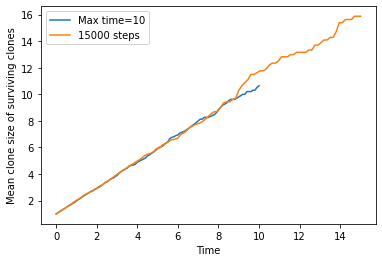

In [23]:
p = Parameters(algorithm='Moran', initial_size_array=np.ones(1000), simulation_steps=15000, print_warnings=True)
s15 = p.get_simulator()
s15.run_sim()

s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='Max time=10')
s15.plot_mean_clone_size_graph_for_non_mutation(ax=plt.gca(), show_spm_fit=False, legend_label='15000 steps')
plt.legend()

Sampling times.   
For many experiments, there are particular times that samples are taken/data is measured.   

The sampling times can be set for a simulation. The simulation will run up until the last simulation step.  
The `times` must be in increasing order. 

============== Setting up ==============
48000 simulation_steps
Using the default mutation rate: 0


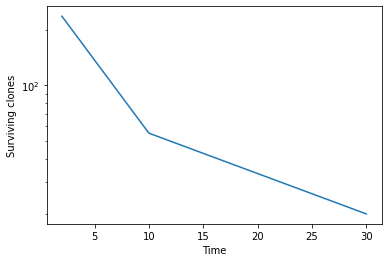

In [28]:
# Say there is an experiment with cells dividing 1.6 times per week, and samples take after 2, 10, and 30 weeks. 
# You can simulate this scenario by setting the `division_rate` and the `times`
p = Parameters(algorithm='Moran', initial_size_array=np.ones(1000), times=[2,10,30], 
               division_rate=1.6, print_warnings=True)
s = p.get_simulator()
s.run_sim()
s.plot_surviving_clones_for_non_mutation()

By default, there are 100 'samples' taken during a simulation (the initial conditions are also recorded).    
If `times` is defined, then one sample is taken per time.  
Otherwise, you can set the number of samples to take by setting `samples` 

In [34]:
# A simulation with two clones
# Take 5 samples
p = Parameters(algorithm='Moran', initial_size_array=[500, 500], samples=5, print_warnings=False)
s = p.get_simulator()
s.run_sim()

# There are 5 samples plus the initial condition. 
s.population_array.toarray()

array([[500., 542., 543., 549., 603., 582.],
       [500., 458., 457., 451., 397., 418.]])

If the requested samples/times do not align with a simulation step, then the sampling times will be slightly shifted.  

Only unique sample points are kept, so if two requested time points are rounded to the same simulation step, then the number of sample points is reduced.   

This is most likely to happen in the WF/WF2D algorithms, where there is a much larger time between simulation steps.

In [36]:
# Requesting 500 samples in this simulation. 
# Only 10 (plus initial condition) will be used, since only 10 simulation steps are run. 
p = Parameters(algorithm='WF', initial_size_array=[500, 500], samples=500, 
               max_time=10, division_rate=1,
               print_warnings=True)
s = p.get_simulator()
s.run_sim()

# There are 10 samples plus the initial condition. 
s.population_array.toarray()

============== Setting up ==============
10 simulation_steps
Using the default mutation rate: 0


array([[500., 515., 544., 520., 487., 499., 490., 477., 464., 460., 464.],
       [500., 485., 456., 480., 513., 501., 510., 523., 536., 540., 536.]])

In [42]:
# Requesting time points that don't align perfectly with the simulation steps. 
# They will be rounded to the closest simulation step.  
p = Parameters(algorithm='WF', initial_size_array=[500, 500], times=[2.3, 4.3, 8.7], 
               division_rate=1,
               print_warnings=True)
s = p.get_simulator()
s.run_sim()

s.population_array.toarray(), s.times

============== Setting up ==============
9 simulation_steps
Times rounded to match simulation steps:
	Times used: [2. 4. 9.]
Using the default mutation rate: 0


(array([[493., 480., 394.],
        [507., 520., 606.]]),
 array([2., 4., 9.]))

In [40]:
# This is much less of a problem with Moran/Moran2D simulations, since there are many more simulation steps
# with much smaller time increments between them
p = Parameters(algorithm='Moran', initial_size_array=[500, 500], times=[2.3, 4.3, 8.7], 
               division_rate=1,
               print_warnings=True)
s = p.get_simulator()
s.run_sim()

s.population_array.toarray(), s.times

============== Setting up ==============
8700 simulation_steps
Using the default mutation rate: 0


(array([[493., 478., 435.],
        [507., 522., 565.]]),
 array([2.3, 4.3, 8.7]))